# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)


In [2]:
# Create Dataframe
df = pd.read_csv(r"data/telco.csv")
# Print shape of dataset
print(df.shape)

(7043, 50)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [3]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Offer 55.04756 % missing values
Internet Type 21.6669 % missing values
Churn Category 73.46301 % missing values
Churn Reason 73.46301 % missing values


In [4]:
features_with_na

['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']

In [5]:
df.Offer.unique()

array([nan, 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [5]:
df['Churn Category'].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [6]:
df['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable', nan], dtype=object)

In [7]:
df['Internet Type'].value_counts()

Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [8]:
df['Churn Reason'].unique()

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

* **There are missing values in the dataset**

Handling missing value

In [9]:
df['Internet Type'] = df['Internet Type'].fillna(df['Internet Type'].mode()[0])
df['Churn Category'] = df['Churn Category'].fillna('Other')
df['Churn Reason'] = df['Churn Reason'].fillna('No Reason')
df['Offer'] = df['Offer'].fillna('No Offer')

In [10]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [11]:
features_with_na

[]

- There is No null value

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [12]:
df.duplicated().sum()

0

* **No Duplicates in the dataset**

**Remove Customer ID, Country, Quarter and State from the dataset as it cannot used in Model Training**

In [13]:
df.drop(columns=['Customer ID','Country','Quarter','State'], inplace=True, axis=1)

In [14]:
df.head().T

,0,1,2,3,4
Gender,Male,Female,Male,Female,Female
Age,78,74,71,78,80
Under 30,No,No,No,No,No
Senior Citizen,Yes,Yes,Yes,Yes,Yes
Married,No,Yes,No,Yes,Yes
Dependents,No,Yes,Yes,Yes,Yes
Number of Dependents,0,1,3,1,1
City,Los Angeles,Los Angeles,Los Angeles,Inglewood,Whittier
Zip Code,90022,90063,90065,90303,90602
Latitude,34.02381,34.044271,34.108833,33.936291,33.972119


# Feature Engineering

## Feature Extraction

### Type of Features

### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Churn Label” column.**

In [15]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [16]:
y.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Churn Label, dtype: object

In [17]:
X.head().T

,0,1,2,3,4
Gender,Male,Female,Male,Female,Female
Age,78,74,71,78,80
Under 30,No,No,No,No,No
Senior Citizen,Yes,Yes,Yes,Yes,Yes
Married,No,Yes,No,Yes,Yes
Dependents,No,Yes,Yes,Yes,Yes
Number of Dependents,0,1,3,1,1
City,Los Angeles,Los Angeles,Los Angeles,Inglewood,Whittier
Zip Code,90022,90063,90065,90303,90602
Latitude,34.02381,34.044271,34.108833,33.936291,33.972119


**Numeric Features**

In [18]:
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 19


**Categorical Features**

In [19]:
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 26


**Manual encoding target column**

In [20]:
# If the target column has No it is encoded as 1 others as 0
y= np.where(y=='No', 1,0)

In [21]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Feature Encoding and Scaling

**Label Encoding**
* Label Encoding is a technique used to convert categorical data into numerical values, making it suitable for machine learning models. Each unique category in a column is assigned a unique integer value.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# cols = ['Offer','Churn Reason','Churn Category','City']
cols = cat_features

# Apply LabelEncoder to the columns
for col in cols:
    X[col] = label_encoder.fit_transform(X[col])

# View transformed DataFrame
# print(df["Churn Reason"])

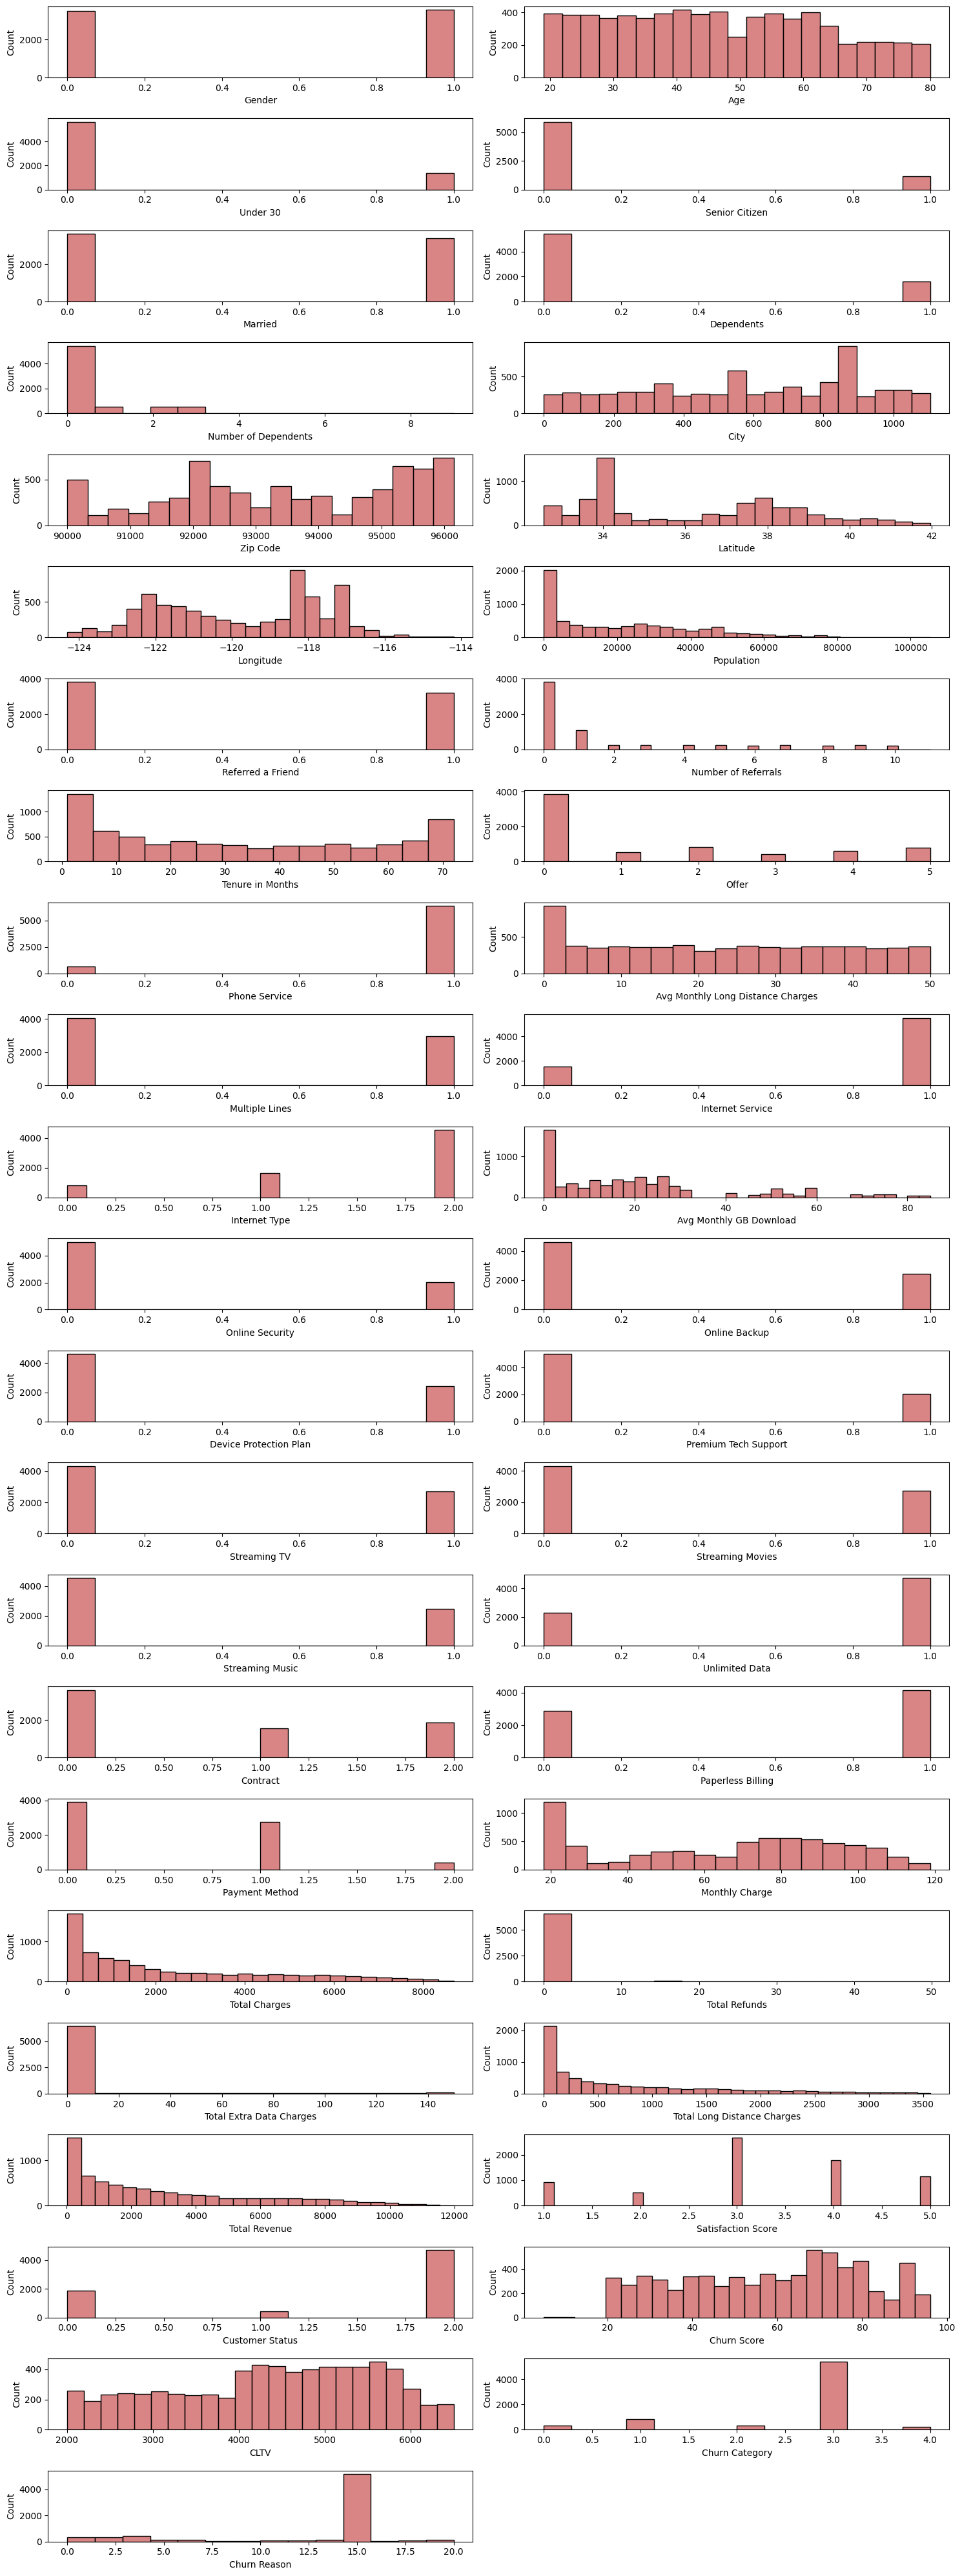

In [23]:
plt.figure(figsize=(15, 40))
for i, col in enumerate(X):
    plt.subplot(23, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

### Feature Transformation

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

- Positiviely Skewed : > 0
- Negative Skew : < 0
- We can handle outliers and then check the skewness.

In [24]:
X.skew(axis=0, skipna=True)

Gender                              -0.019031
Age                                  0.162186
Under 30                             1.508777
Senior Citizen                       1.833633
Married                              0.067922
Dependents                           1.276686
Number of Dependents                 2.109932
City                                -0.214024
Zip Code                            -0.209615
Latitude                             0.314804
Longitude                           -0.091932
Population                           0.912854
Referred a Friend                    0.170753
Number of Referrals                  1.446060
Tenure in Months                     0.240543
Offer                                0.917537
Phone Service                       -2.727153
Avg Monthly Long Distance Charges    0.049176
Multiple Lines                       0.316610
Internet Service                    -1.375769
Internet Type                       -1.153788
Avg Monthly GB Download           

In [25]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_clean = pt.fit_transform(X)

In [26]:
X

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score,CLTV,Churn Category,Churn Reason
0,1,78,0,1,0,0,0,554,90022,34.023810,-118.156582,68701,0,0,1,0,0,0.00,0,1,1,8,0,0,1,0,0,1,0,0,0,1,0,39.65,39.65,0.00,20,0.00,59.65,3,0,91,5433,1,5
1,0,74,0,1,1,1,1,554,90063,34.044271,-118.185237,55668,1,1,8,5,1,48.85,1,1,2,17,0,1,0,0,0,0,0,1,0,1,1,80.65,633.30,0.00,0,390.80,1024.10,3,0,69,5302,1,3
2,1,71,0,1,0,1,3,554,90065,34.108833,-118.229715,47534,0,0,18,4,1,11.33,1,1,2,52,0,0,0,0,1,1,1,1,0,1,0,95.45,1752.55,45.61,0,203.94,1910.88,2,0,81,3179,1,3
3,0,78,0,1,1,1,1,448,90303,33.936291,-118.332639,27778,1,1,25,3,1,19.76,0,1,2,12,0,1,1,0,1,1,0,1,0,1,0,98.50,2514.50,13.43,0,494.00,2995.07,2,0,88,5337,2,11
4,0,80,0,1,1,1,1,1072,90602,33.972119,-118.020188,26265,1,1,37,3,1,6.33,1,1,2,14,0,0,0,0,0,0,0,1,0,1,0,76.50,2868.15,0.00,0,234.21,3102.36,2,0,67,2793,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,30,0,0,0,0,0,514,92285,34.341737,-116.539416,2182,0,0,72,0,1,22.77,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,21.15,1419.40,19.31,0,1639.44,3039.53,5,2,45,5306,3,15
7039,1,38,0,0,1,1,2,2,92301,34.667815,-117.536183,18980,1,1,24,3,1,36.05,1,1,0,24,1,0,1,1,1,1,1,1,1,1,2,84.80,1990.50,48.23,0,865.20,2807.47,3,2,59,2140,3,15
7040,0,30,0,0,1,1,2,22,92304,34.559882,-115.637164,42,1,4,72,0,1,29.66,1,1,2,59,0,1,1,0,1,1,1,1,1,1,1,103.20,7362.90,45.38,0,2135.52,9453.04,4,2,71,5560,3,15
7041,0,32,0,0,1,1,2,26,92305,34.167800,-116.864330,301,1,1,11,0,0,0.00,0,1,1,17,1,0,0,0,0,0,0,1,0,1,0,29.60,346.45,27.24,0,0.00,319.21,4,2,59,2793,3,15


### Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [27]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_clean,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5634, 45), (1409, 45))

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.model_selection import cross_val_score

In [29]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [30]:
models = {
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
     "Support Vector Classifier": SVC()

}

In [32]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [33]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Logistic Regression
Model performance for Training set
- Accuracy: 0.8923
- F1 score: 0.9276
- Precision: 0.9212
- Recall: 0.9342
- Roc Auc Score: 0.8538
----------------------------------
Model performance for Test set
- Accuracy: 0.8886
- F1 score: 0.9229
- Precision: 0.9144
- Recall: 0.9316
- Roc Auc Score: 0.8558


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.7980
- F1 score: 0.8709
- Precision: 0.8257
- Recall: 0.9212
- Roc Auc Score: 0.6849
----------------------------------
Model performance for Test set
- Accuracy: 0.6934
- F1 score: 0.8024
- Precision: 0.7451
- Recall: 0.8692
- Roc Auc Score: 0.5596


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.7393
- F1 score: 0.8501
- Precision: 0.7393
- Recall: 1.0000
- Roc Auc Score: 0.5000
----------------------------------
Model performance for Test set
- Accuracy: 0.7161
- F1 score: 0.8346
- Precision: 0.7161
- Recall: 1.0000
- Roc Auc Score: 0.5000




**Results of All Models**

In [34]:
base_model_report

,Model Name,Accuracy
0,Logistic Regression,0.888573
2,Support Vector Classifier,0.716111
1,K-Neighbors Classifier,0.693400


### Hyper-parameter tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Initialize parameters for Hyperparameter tuning
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],            # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],        # Solver algorithm
    'max_iter': [100, 200, 300]                      # Maximum iterations for convergence
}

knn_params = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],    # Algorithm to compute nearest neighbors
    'weights': ['uniform', 'distance'],                       # Weight function used in prediction
    'n_neighbors': [3, 4, 5, 7, 9],                          # Number of neighbors to use
    'p': [1, 2]                                              # Power parameter for the Minkowski distance (1=Manhattan, 2=Euclidean)
}

svc_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type to be used in the algorithm
    'gamma': ['scale', 'auto'],                      # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'degree': [3, 4, 5]                               # Degree for the polynomial kernel function (used only for 'poly' kernel)
}


In [37]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('Logistic Regression', LogisticRegression(), logreg_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("SVC", SVC(), svc_params)
]

model_param = {}

# Perform RandomizedSearchCV for each model
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2, 
                                n_jobs=-1)
    random.fit(X_clean, y)  
    model_param[name] = random.best_params_



Fitting 3 folds for each of 54 candidates, totalling 162 fits


[CV] END ............C=0.001, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ............C=0.001, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ............C=0.001, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END .................C=0.001, max_iter=100, solver=saga; total time=   0.1s
[CV] END .................C=0.001, max_iter=100, solver=saga; total time=   0.1s
[CV] END ................C=0.001, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.001, max_iter=100, solver=saga; total time=   0.1s
[CV] END ................C=0.001, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.001, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.001, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.001, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.001, max_iter=200, solver=liblinear; total time=   0.1s
[CV] END ............C=0.001

/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................C=1, max_iter=300, solver=liblinear; total time=   0.1s
[CV] END ................C=1, max_iter=300, solver=liblinear; total time=   0.2s
[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.2s
[CV] END .....................C=1, max_iter=100, solver=saga; total time=   0.8s
[CV] END ....................C=1, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.1s
[CV] END ....................C=1, max_iter=200, solver=lbfgs; total time=   0.0s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.2s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1, max_iter=200, solver=saga; total time=   1.8s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=10, max_iter=100, solver=saga; total time=   1.1s
[CV] END ...................C=10, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ...................C=10, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ....................C=10, max_iter=100, solver=saga; total time=   0.9s
[CV] END ...................C=10, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ...............C=10, max_iter=200, solver=liblinear; total time=   0.1s
[CV] END ...............C=10, max_iter=200, solver=liblinear; total time=   0.1s
[CV] END ...............C=10, max_iter=200, solver=liblinear; total time=   0.1s
[CV] END .....................C=1, max_iter=200, solver=saga; total time=   1.1s
[CV] END ....................C=10, max_iter=100, solver=saga; total time=   0.8s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1, max_iter=300, solver=saga; total time=   2.7s
[CV] END .....................C=1, max_iter=200, solver=saga; total time=   1.0s
[CV] END ....................C=1, max_iter=300, solver=lbfgs; total time=   0.0s
[CV] END ...................C=10, max_iter=300, solver=lbfgs; total time=   0.0s
[CV] END ...............C=10, max_iter=300, solver=liblinear; total time=   0.1s
[CV] END ...............C=10, max_iter=300, solver=liblinear; total time=   0.1s
[CV] END ...............C=10, max_iter=300, solver=liblinear; total time=   0.1s
[CV] END ....................C=10, max_iter=200, solver=saga; total time=   1.7s
[CV] END .....................C=1, max_iter=300, solver=saga; total time=   1.1s
[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.0s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.1s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.2s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.1s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=10, max_iter=200, solver=saga; total time=   2.1s
[CV] END .....................C=1, max_iter=300, solver=saga; total time=   0.8s
[CV] END ..................C=100, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END ..............C=100, max_iter=200, solver=liblinear; total time=   0.1s
[CV] END ..............C=100, max_iter=200, solver=liblinear; total time=   0.1s
[CV] END ..............C=100, max_iter=200, solver=liblinear; total time=   0.1s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=100, max_iter=100, solver=saga; total time=   1.0s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=10, max_iter=200, solver=saga; total time=   1.6s
[CV] END ...................C=10, max_iter=300, solver=lbfgs; total time=   0.0s
[CV] END ...................C=10, max_iter=300, solver=lbfgs; total time=   0.0s
[CV] END ...................C=100, max_iter=100, solver=saga; total time=   1.0s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=10, max_iter=300, solver=saga; total time=   3.3s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=100, max_iter=200, solver=saga; total time=   2.2s
[CV] END ...................C=100, max_iter=100, solver=saga; total time=   1.1s
[CV] END ..............C=100, max_iter=300, solver=liblinear; total time=   0.2s
[CV] END ..............C=100, max_iter=300, solver=liblinear; total time=   0.1s
[CV] END ..............C=100, max_iter=300, solver=liblinear; total time=   0.1s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=100, max_iter=200, solver=saga; total time=   1.8s
[CV] END ..................C=100, max_iter=300, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, max_iter=300, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, max_iter=300, solver=lbfgs; total time=   0.0s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=100, max_iter=200, solver=saga; total time=   2.4s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=100, max_iter=300, solver=saga; total time=   2.4s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=10, max_iter=300, solver=saga; total time=   3.5s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=100, max_iter=300, solver=saga; total time=   3.3s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=100, max_iter=300, solver=saga; total time=   2.4s


/home/highfrezh/anaconda3/envs/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=10, max_iter=300, solver=saga; total time=   1.9s
[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.0s
Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   1.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   1.1s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   1.2s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   1.3s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=auto, n_neighbors=3, p=2,

In [38]:
# Print out the best parameters for each model
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for Logistic Regression -------------------
{'solver': 'lbfgs', 'max_iter': 100, 'C': 1}
---------------- Best Params for KNN -------------------
{'weights': 'uniform', 'p': 1, 'n_neighbors': 4, 'algorithm': 'auto'}
---------------- Best Params for SVC -------------------
{'kernel': 'linear', 'gamma': 'auto', 'degree': 5, 'C': 1}


In [39]:
model_param

{'Logistic Regression': {'solver': 'lbfgs', 'max_iter': 100, 'C': 1},
 'KNN': {'weights': 'uniform', 'p': 1, 'n_neighbors': 4, 'algorithm': 'auto'},
 'SVC': {'kernel': 'linear', 'gamma': 'auto', 'degree': 5, 'C': 1}}

### Retraining the Model with best Parameters

In [41]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Logistic Regression": LogisticRegression(**model_param['Logistic Regression']),
    "K-Neighbors Classifier": KNeighborsClassifier(**model_param['KNN']),
    "Support Vector Classifier": SVC(**model_param['SVC'])
}
tuned_report =evaluate_models(X=X_clean, y=y, models=best_models)

Logistic Regression
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9993
- F1 score: 0.9995
- Precision: 1.0000
- Recall: 0.9990
- Roc Auc Score: 0.9995


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9956
- F1 score: 0.9970
- Precision: 0.9950
- Recall: 0.9990
- Roc Auc Score: 0.9924
----------------------------------
Model performance for Test set
- Accuracy: 0.9901
- F1 score: 0.9931
- Precision: 0.9873
- Recall: 0.9990
- Roc Auc Score: 0.9833


Support Vector Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000




In [43]:
tuned_report

,Model Name,Accuracy
2,Support Vector Classifier,1.000000
0,Logistic Regression,0.999290
1,K-Neighbors Classifier,0.990064


General Observations:
- Logistic Regression and SVC show near-perfect performance, both on the training and test sets, suggesting that these models generalize very well.
- K-Neighbors Classifier shows a minor performance drop on the test set, which is a sign of mild overfitting, but it is still performing very well overall.

In [44]:
best_model = SVC(**model_param['SVC'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00      1009

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



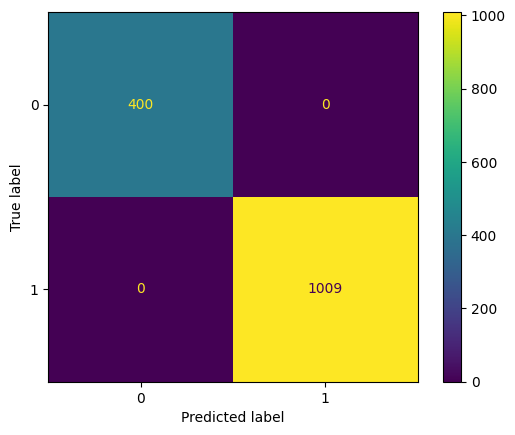

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is Support Vector Classifier with Accuracy 100%